In [7]:
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import skew


In [5]:

abalone = pd.read_csv('abalone.csv')
abalone.head()
# Það eru engin missing values


,sex,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,classRings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
abalone.describe()

,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,classRings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
 # Return unbiased variance over requested axis.\n",
abalone.var()

length            0.014422
diameter          0.009849
height            0.001750
wholeWeight       0.240481
shuckedWeight     0.049268
visceraWeight     0.012015
shellWeight       0.019377
classRings       10.395266
dtype: float64

In [20]:
numericFeatures = abalone.select_dtypes(include=[np.number]).columns # Í raun allt nema sex

skewedVals = skew(abalone[numerical_features])
temp = pd.concat([pd.DataFrame(list(numerical_features), columns=['Feature']), pd.DataFrame(list(skewedVals), columns=['deg of skewness'])], axis = 1)
temp.sort_values(by = 'deg of skewness' , ascending = False)


# Fyrir normal dreifingu er degree of skewe... um 0. Jákvæð tala segir til um að það er meiri "weight" í hægri helming dreifingarinnar
# Height, rings og shuckedWeight

,Feature,deg of skewness
2,height,3.127694
7,classRings,1.113702
4,shuckedWeight,0.718840
6,shellWeight,0.620704
5,visceraWeight,0.591640
3,wholeWeight,0.530768
1,diameter,-0.608979
0,length,-0.639643


In [18]:
categorical_features

Index(['sex'], dtype='object')

<AxesSubplot:>

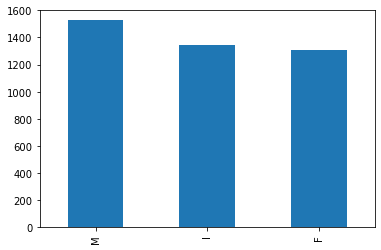

In [13]:
abalone['sex'].value_counts().plot.bar()
# nokkuð jöfn dreifing á Male Female og Infant classes

<AxesSubplot:>

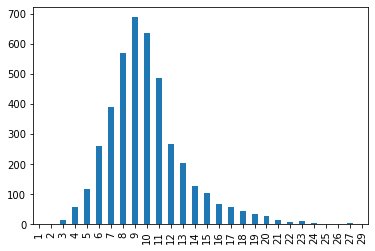

In [30]:
abalone['classRings'].value_counts().sort_index().plot.bar()
# Fylgja normaldreifingu

<AxesSubplot:xlabel='sex', ylabel='classRings'>

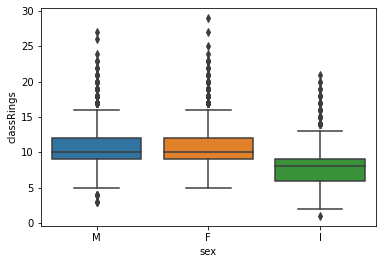

In [31]:
sns.boxplot(x = 'sex', y = 'classRings', data = abalone)

<AxesSubplot:xlabel='sex', ylabel='shellWeight'>

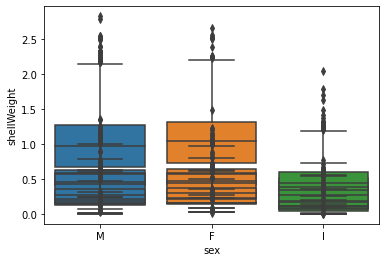

In [14]:
sns.boxplot(x = 'sex', y = 'length', data = abalone)
sns.boxplot(x = 'sex', y = 'diameter', data = abalone)
sns.boxplot(x = 'sex', y = 'height', data = abalone)
sns.boxplot(x = 'sex', y = 'wholeWeight', data = abalone)
sns.boxplot(x = 'sex', y = 'shuckedWeight', data = abalone)
sns.boxplot(x = 'sex', y = 'visceraWeight', data = abalone)
sns.boxplot(x = 'sex', y = 'shellWeight', data = abalone)


<AxesSubplot:xlabel='sex', ylabel='classRings'>

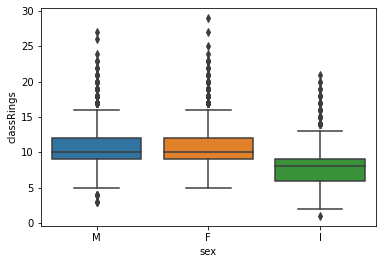

In [15]:
sns.boxplot(x = 'sex', y = 'classRings', data = abalone)

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
new_df = pca.fit_transform(abalone)
model = KMeans(n_clusters = optimalK.elbow).fit(new_df)

plt.figure(figsize=(8, 6))
plt.scatter(new_df[:,0], new_df[:,1], c=model.labels_.astype(float))

ModuleNotFoundError: No module named 'sklearn'